In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns

In [81]:
data=pd.read_excel('최우수DB.xlsx')
data.head()

,Unnamed: 0,수령인 휴대전화,상품명,색깔_x,Unnamed: 3,색깔_y,카테고리,RGB,패턴재질,모양,계절,평균평점,스타일,종합점수
0,0,010-9926-8956,[La belle rose]토버 숏자켓,블랙,NaN,네이비,자켓,"0, 0, 129",무지,크롭,가을,0.0,오피스,0.0
1,1,010-9926-8956,[La belle rose]토버 숏자켓,블랙,NaN,블랙,자켓,"0, 0, 0",무지,크롭,가을,0.0,오피스,0.0
2,2,ekthadk1113010-7907-3120,[La belle rose]토버 숏자켓,네이비,NaN,네이비,자켓,"0, 0, 129",무지,크롭,가을,0.0,오피스,0.0
3,3,ekthadk1113010-7907-3120,[La belle rose]토버 숏자켓,네이비,NaN,블랙,자켓,"0, 0, 0",무지,크롭,가을,0.0,오피스,0.0
4,4,kd03107010-9926-8956,[La belle rose]토버 숏자켓,블랙,NaN,네이비,자켓,"0, 0, 129",무지,크롭,가을,0.0,오피스,0.0


In [82]:
data.columns

Index(['Unnamed: 0', '수령인 휴대전화', '상품명', '색깔_x', 'Unnamed: 3', '색깔_y', '카테고리',
       'RGB', '패턴재질', '모양', '계절', '평균평점', '스타일', '종합점수'],
      dtype='object')

In [83]:
data=data[['상품명','색깔_x','스타일','카테고리']]

In [84]:
data.head()

,상품명,색깔_x,스타일,카테고리
0,[La belle rose]토버 숏자켓,블랙,오피스,자켓
1,[La belle rose]토버 숏자켓,블랙,오피스,자켓
2,[La belle rose]토버 숏자켓,네이비,오피스,자켓
3,[La belle rose]토버 숏자켓,네이비,오피스,자켓
4,[La belle rose]토버 숏자켓,블랙,오피스,자켓


In [85]:
data[['스타일','색깔_x']].groupby('색깔_x').count()

,스타일
색깔_x,
골드,221
그레이,3037
그레이,26
그레이&화이트,4
그레이쉬블루,49
...,...
핑크,12
핑크베이지,516
화이트,1161


In [86]:
datac=data.copy()

In [87]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44238 entries, 0 to 44237
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     44238 non-null  object
 1   색깔_x    44238 non-null  object
 2   스타일     44231 non-null  object
 3   카테고리    44238 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [88]:
datac.loc[:,'상품명'] = datac.loc[:,'상품명'].astype('category').cat.codes
datac.loc[:,'색깔_x'] = datac.loc[:,'색깔_x'].astype('category').cat.codes
datac.loc[:,'스타일'] = datac.loc[:,'스타일'].astype('category').cat.codes
datac.loc[:,'카테고리'] = datac.loc[:,'카테고리'].astype('category').cat.codes


In [89]:
datac.head()

,상품명,색깔_x,스타일,카테고리
0,198,70,10,42
1,198,70,10,42
2,198,10,10,42
3,198,10,10,42
4,198,70,10,42


In [93]:
model=DBSCAN(min_samples=6)
predict=pd.DataFrame(model.fit_predict(datac))
predict.columns=['predict']

In [100]:
r=pd.concat([datac,predict],axis=1)

In [101]:
r['predict'].unique

<bound method Series.unique of 0       -1
1       -1
2       -1
3       -1
4       -1
        ..
44233   -1
44234   -1
44235   -1
44236   -1
44237   -1
Name: predict, Length: 44238, dtype: int64>

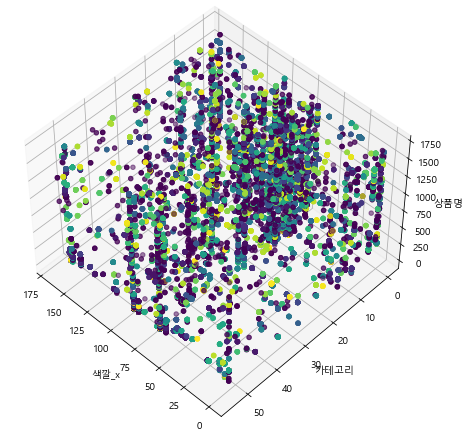

In [112]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['색깔_x'],r['카테고리'],r['상품명'],c=r['predict'],alpha=0.5)
ax.set_xlabel('색깔_x')
ax.set_ylabel('카테고리')
ax.set_zlabel('상품명')
plt.show()


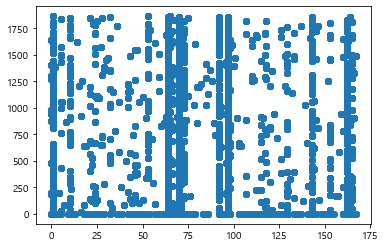

In [105]:
plt.scatter(r['색깔_x'],r['predict'])

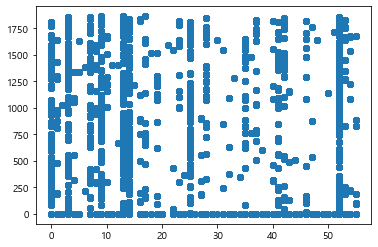

In [106]:
plt.scatter(r['카테고리'],r['predict'])

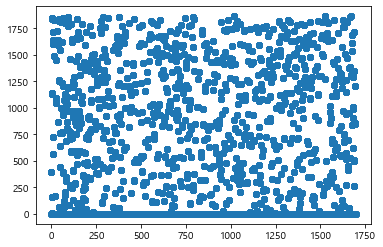

In [107]:
plt.scatter(r['상품명'],r['predict'])

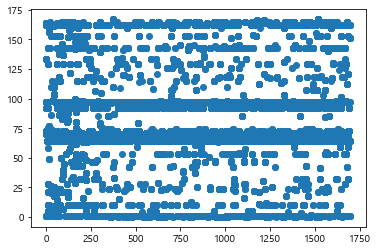

In [108]:
plt.scatter(r['상품명'],r['색깔_x'])

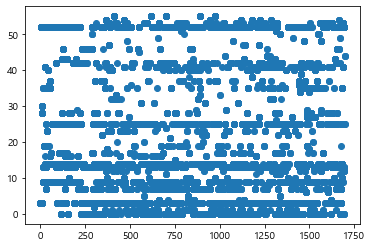

In [109]:
plt.scatter(r['상품명'],r['카테고리'])

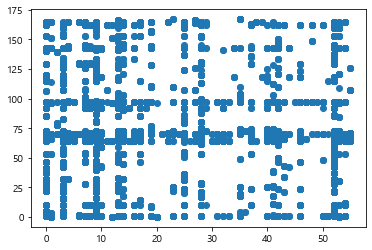

In [110]:
plt.scatter(r['카테고리'],r['색깔_x'])